In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle
import random
from tqdm import tqdm
import numpy as np
import statsmodels.api as sm

from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans, AffinityPropagation, DBSCAN, FeatureAgglomeration
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from IPython.display import clear_output, Image, display
from sklearn.datasets.samples_generator import make_blobs
import itertools
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import pairwise_distances

from ensembles import *
plt.ion()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Generate input data

(300, 2)


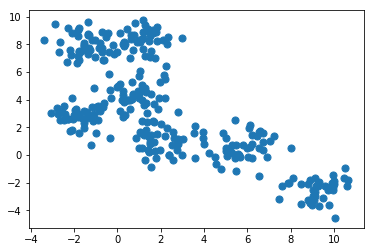

In [2]:
X, y_true = make_blobs(n_samples=300, centers=7,
                       cluster_std=.80, random_state=0)
/print X.shape
plt.scatter(X[:, 0], X[:, 1], s=50);

## Kmeans clustering

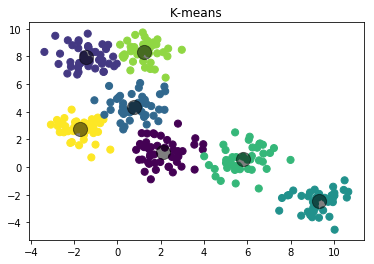

In [3]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
labels1 = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels1, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('K-means')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## CURE

In [4]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

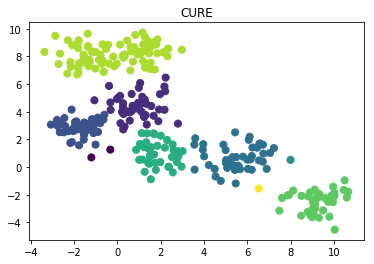

In [5]:
cure_instance = cure(X, 9);
cure_instance.process();
result = cure_instance.get_clusters();
labels2 = np.zeros(len(X))
for i in range(len(result)):
    labels2[result[i]] = i
    
plt.scatter(X[:, 0], X[:, 1], c=labels2, s=50, cmap='viridis')
plt.title('CURE');

## GMM

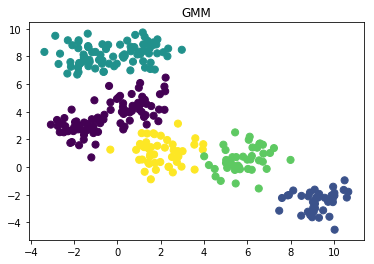

In [6]:
model = GaussianMixture(5, covariance_type ='full', random_state = 0).fit(X)
labels3 = model.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels3, s=50, cmap='viridis')
plt.title('GMM');

## Ensemble

https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781784396053/10/ch10lvl1sec55/clustering-ensembles


As a basic ensemble, we can first cluster the data many times and record the labels from each run. We then record how many times each pair of samples was clustered together in a new matrix. This is the essence of the Evidence Accumulation Clustering (EAC) algorithm.

EAC has two major steps. The first step is to cluster the data many times using a lower-level clustering algorithm such as k-means and record the frequency that samples were in the same cluster, in each iteration. This is stored in a coassociation matrix. The second step is to perform a cluster analysis on the resulting coassociation matrix, which is performed using another type of clustering algorithm called hierarchical clustering. This has an interesting property, as it is mathematically the same as finding a tree that links all the nodes together and removing weak links.

We can create a coassociation matrix from an array of labels by iterating over each of the labels and recording where two samples have the same label. We use SciPy's csr_matrix, which is a type of sparse matrix

In [7]:
labels1.shape, labels2.shape

((300,), (300,))

MST thresholds (array([-1.        , -0.66666667, -0.33333333]), array([285,  10,   3], dtype=int64))


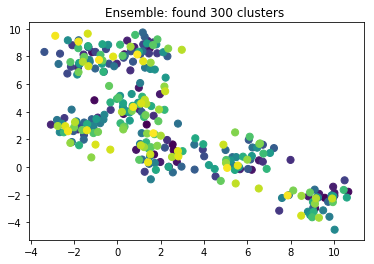

In [13]:
number_of_clusters, labels = ensemble(np.vstack([labels1, labels2, labels3]), cut_threshold=2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Ensemble: found %s clusters ' % number_of_clusters);